1)Provide code which loads the training and testing data from the provided files. Clearly comment your
code

In [2]:
import pandas as pd
#read all in
test_ham=pd.read_csv('/content/drive/MyDrive/H3DS5230Data/flagTestHam.csv')
test_spam=pd.read_csv('/content/drive/MyDrive/H3DS5230Data/flagTestSPAM.csv')
train_ham=pd.read_csv('/content/drive/MyDrive/H3DS5230Data/flagTrainHam.csv')
train_spam=pd.read_csv('/content/drive/MyDrive/H3DS5230Data/flagTrainSPAM.csv')
#add label for spam of ham
train_spam['label']=1
train_ham['label']=0
test_spam['label']=1
test_ham['label']=0
#concat train and test
train=pd.concat([train_spam, train_ham], ignore_index=True)
test=pd.concat([test_spam, test_ham], ignore_index=True)
#make label y varaiable
x_train=train.drop(columns='label')
y_train=train['label']
x_test=test.drop(columns='label')
y_test=test['label']

2)Class notes provide the optimum classifier. In this section, provide your code for computing the minimal
sucient statistics from the training data needed to estimate the classifier parameters. Compute the minimal
sucient statistics needed to classify the testing data.

In [3]:
#do spam, ham seperaelty
test_spam_stat=[]
train_spam_stat=[]
test_ham_stat=[]
train_ham_stat=[]
for i in x_train.columns:
  test_spam_stat.append(test_spam[i].sum())
  train_spam_stat.append(train_spam[i].sum())
  test_ham_stat.append(test_ham[i].sum())
  train_ham_stat.append(train_ham[i].sum())

3)provide your code to compute the classifier parameter estimates in two ways: Maximum Likelihood
Estimation and Maximum A Posteriori Estimation. Provide side-by-side plots displaying points plots of Ham
parameter estimates on the left, and SPAM parameter estimates on the right. For each plot, display the 40
entry hit probabilities for MLE in red points, and MAP in green points. Clearly label your plots and provide
a legend for each.
#for mle compute the mean, for map do laplace smoothing

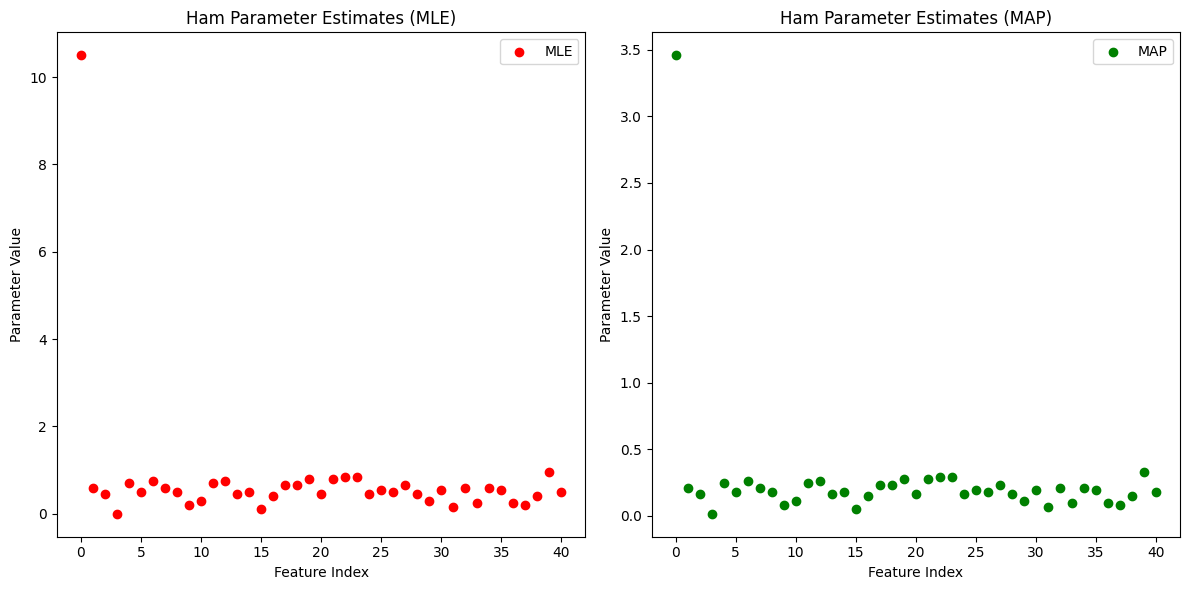

In [6]:

# MLE
mle_ham_params = np.array(train_ham_stat) / len(train_ham)
mle_spam_params = np.array(train_spam_stat) / len(train_spam)

# MAP with Laplace smoothing
alpha = 1  # Laplace smoothing parameter

map_ham_params = (np.array(train_ham_stat) + alpha) / (len(train_ham) + alpha * len(train_ham_stat))
map_spam_params = (np.array(train_spam_stat) + alpha) / (len(train_spam) + alpha * len(train_spam_stat))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(range(len(train_ham_stat)), mle_ham_params, color='red', label='MLE', marker='o')
plt.title('Ham MLE')
plt.xlabel('Vector/word index')
plt.ylabel('Parameter Value')
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(range(len(train_ham_stat)), map_ham_params, color='green', label='MAP', marker='o')
plt.title('Ham MAP)')
plt.xlabel('Vector/word index')
plt.ylabel('Parameter Value')
plt.legend()
plt.tight_layout()
plt.show()

4)Provide your code to compute the logarithm of the ratio of the A Posteriori probabilities (LAPPR) of SPAM
(numerator) vs Ham for all testing data. Clearly comment your code.
#take the log of the results above

In [8]:
# Compute the log probabilities for spam and ham classes
log_prob_spam = map_classifier.feature_log_prob_[1]
log_prob_ham = map_classifier.feature_log_prob_[0]

# Compute the class priors (log prior probabilities) for spam and ham classes
log_prior_spam = np.log(len(y_train[y_train == 1]) / len(y_train))
log_prior_ham = np.log(len(y_train[y_train == 0]) / len(y_train))

# Compute the log likelihood for each sample in the testing data
log_likelihood_spam = np.dot(x_test, log_prob_spam.T) + log_prior_spam
log_likelihood_ham = np.dot(x_test, log_prob_ham.T) + log_prior_ham

# Compute the logarithm of the ratio of A Posteriori probabilities (LAPPR)
lappr = log_likelihood_spam - log_likelihood_ham

# Print LAPPR for the first few samples
print("LAPPR for the first 5 samples:")
print(lappr[:5])

LAPPR for the first 5 samples:
[7.0269426  4.4703265  3.46568349 2.87875024 5.49906728]


5)Provide histograms of the LAPPR in side-by-side plots with SPAM testing files on the left and Ham files on
the right. Use 100-bins in the histograms, coloring the SPAM histogram green and the Ham histogram red.

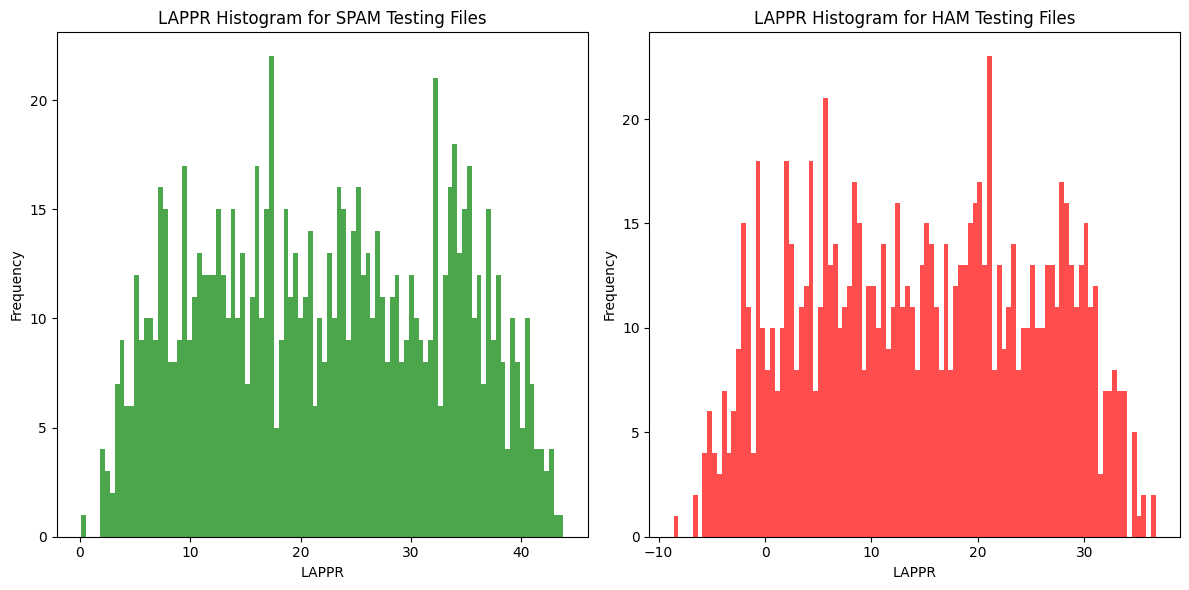

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(lappr[y_test == 1], bins=100, color='green', alpha=0.7)
plt.title('LAPPR SPAM')
plt.xlabel('LAPPR')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(lappr[y_test == 0], bins=100, color='red', alpha=0.7)
plt.title('LAPPR HAM')
plt.xlabel('LAPPR')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

6)Provide your code below to compute the error rates for SPAM testing files and Ham testing files.
#make a lograthimic ratio vector

In [10]:
threshold = 0
predictions = (lappr > threshold).astype(int)
spam_errors = np.sum((predictions[y_test == 1] == 0).astype(int))
ham_errors = np.sum((predictions[y_test == 0] == 1).astype(int))
total_spam_samples = np.sum(y_test == 1)
total_ham_samples = np.sum(y_test == 0)
spam_error_rate = spam_errors / total_spam_samples
ham_error_rate = ham_errors / total_ham_samples
print(f"SPAM Error Rate: {spam_error_rate:.2%}")
print(f"HAM Error Rate: {ham_error_rate:.2%}")

SPAM Error Rate: 0.00%
HAM Error Rate: 89.60%


<ipython-input-1-c421984627c0>:10: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(np.log((1/theta) * ((x >= 0) & (x <= theta))) for x in x_values)
<ipython-input-1-c421984627c0>:10: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log((1/theta) * ((x >= 0) & (x <= theta))) for x in x_values)


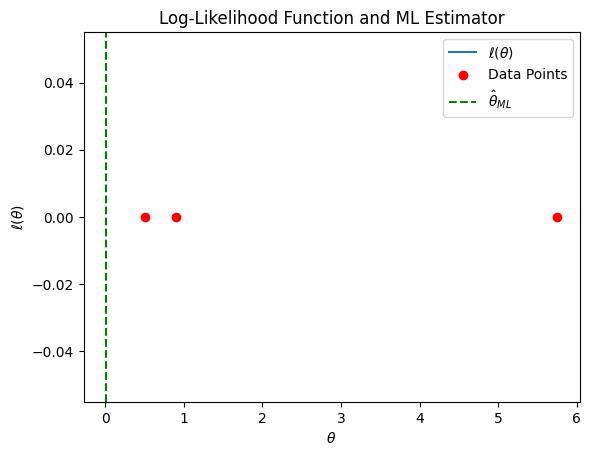

ML Estimator for theta (theta_ml): 0.01


In [1]:
#For question 3
import numpy as np
import matplotlib.pyplot as plt
N = 3
x_values = [1/2, 23/4, 9/10]

# Log-likelihood function
def log_likelihood(theta, x_values):
    return np.sum(np.log((1/theta) * ((x >= 0) & (x <= theta))) for x in x_values)

theta_values = np.linspace(0.01, 5, 100)
log_likelihood_values = [log_likelihood(theta, x_values) for theta in theta_values]
theta_ml = theta_values[np.argmax(log_likelihood_values)]

plt.plot(theta_values, log_likelihood_values, label=r'$\ell(\theta)$')
plt.scatter(x_values, np.zeros_like(x_values), color='red', marker='o', label='Data Points')
plt.axvline(theta_ml, color='green', linestyle='--', label=r'$\hat{\theta}_{ML}$')
plt.title('Log-Likelihood Function and ML Estimator')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\ell(\theta)$')
plt.legend()
plt.show()
print(f'ML Estimator for theta (theta_ml): {theta_ml}')
